# Neural Networks Assignment (Graded)

Welcome to your first (required) programming assignment! You will build a Neural Network to recognize various everyday objects. This assignment will step you through how to do this with a Neural Network mindset, and will also hone your intuitions about deep learning.

**Instructions:**
* Do not modify any of the codes.
* Only write code when prompted. For example in some sections you will find the following,
```
# YOUR CODE GOES HERE
# YOUR CODE ENDS HERE
# TODO
```
Only modify those sections of the code.

**You will learn to:**
* Explore the CIFAR10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html
* Build the general architecture of a neural network, including:
  * Initializing parameters
  * Calculating the cost function and its gradient
  * Using an optimization algorithm (gradient descent)
* Gather all three functions above into a main model function, in the right order.

In [1]:
import tensorflow as tf
import numpy as np

from helpers import *
from tests import *

In [2]:
# Import dataset
from tensorflow.keras.datasets import cifar10

# Load dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


## Visualizing the dataset

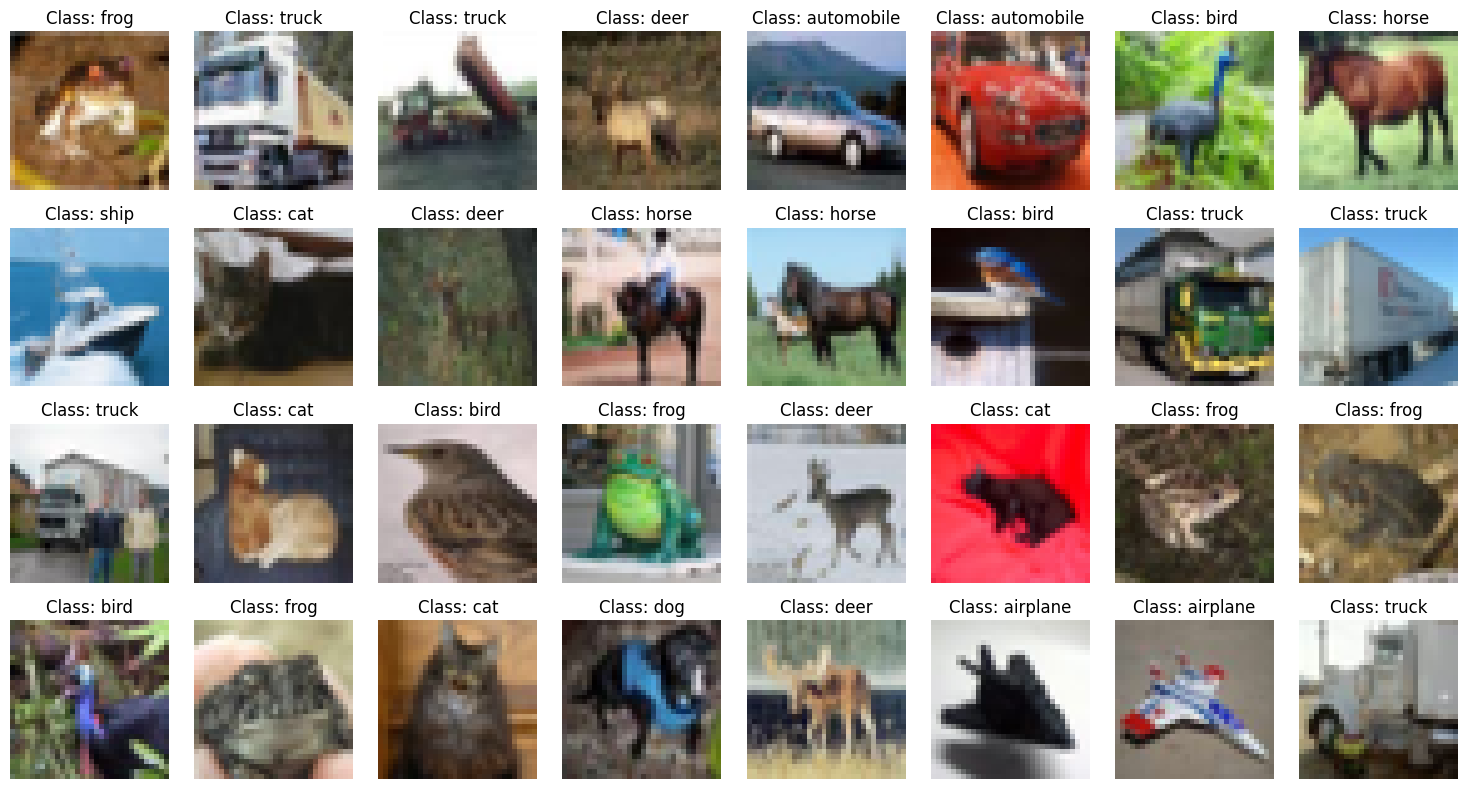

In [3]:
import matplotlib.pyplot as plt

# Visualize a grid of images from the training set
display_image_grid(X_train[:32], y_train[:32])


#### How many images does the training dataset contain?


In [4]:
# YOUR CODE GOES HERE
print(X_train.shape[0])

50000



**Expected Output:**
```
50000
```



#### How many images does the testing dataset contain?


In [5]:
# YOUR CODE GOES HERE
print(X_test.shape[0])

10000



**Expected Output:**
```
10000
```



#### How many output classes does the dataset contain? Can you list them?

In [6]:
# YOUR CODE GOES HERE
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Expected Output:**
```
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)
```

#### Find out the total number of images in each class.

In [7]:
# TODO

num_classes = len(np.unique(y_train))
for cls in range(num_classes):
  count = 0
  # YOUR CODE GOES HERE
  count = np.sum(y_train == cls)
  # YOUR CODE ENDS HERE
  print("Number of images belonging to {} is {}".format(cls, count))

Number of images belonging to 0 is 5000
Number of images belonging to 1 is 5000
Number of images belonging to 2 is 5000
Number of images belonging to 3 is 5000
Number of images belonging to 4 is 5000
Number of images belonging to 5 is 5000
Number of images belonging to 6 is 5000
Number of images belonging to 7 is 5000
Number of images belonging to 8 is 5000
Number of images belonging to 9 is 5000


**Expected Output:**
```
Number of images belonging to 0 is 5000
Number of images belonging to 1 is 5000
Number of images belonging to 2 is 5000
Number of images belonging to 3 is 5000
Number of images belonging to 4 is 5000
Number of images belonging to 5 is 5000
Number of images belonging to 6 is 5000
Number of images belonging to 7 is 5000
Number of images belonging to 8 is 5000
Number of images belonging to 9 is 5000
```



---



# Preprocessing the dataset
We shall be performing the following steps to preprocess our dataset in order to get the highest possible model performance:

1. **Normalization:** Scaling down the pixel values between 0 to 1.
2. **Flattening:** Flattenning the dataset such that the shape of the image (num_px, num_px, 3) are flattened into single vectors of shape (num_px
 num_px
 3, 1).
3. **One Hot Encoding:** Encoding the values into a one hot vector.

In [9]:
# TODO

def data_preprocessing(X_train, X_test, y_train, y_test):

    """Preprocesses the training and testing data for a machine learning model.

    Args:
        X_train: Training dataset features.
        X_test: Testing dataset features.
        y_train: Training dataset labels.
        y_test: Testing dataset labels.

    Returns:
        X_train: Preprocessed training dataset features.
        X_test: Preprocessed testing dataset features.
        y_train: Preprocessed training dataset labels.
        y_test: Preprocessed testing dataset labels.

    """

    # Data Normalization
    # YOUR CODE GOES HERE
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Flattening
    # YOUR CODE GOES HERE
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    # One Hot Encoding
    # YOUR CODE GOES HERE
    y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes=10)
    y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes=10)

    # YOUR CODE ENDS HERE
    preprocessing_tests(X_train, X_test, y_train_oh, y_test_oh)

    return X_train, X_test, y_train_oh, y_test_oh



# Model Building

Here, you shall be building a feedforward neural network with atleast 3 hidden neurons.

In [10]:
# TODO

# Import necessary modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

def build_model(input_shape, num_classes):
    """Builds a feedforward neural network model.

    Args:
        input_shape: Tuple specifying the input shape.
        num_classes: Number of output classes.

    Returns:
        Compiled Keras model.
    """
    model = Sequential()
    model.add(Input(input_shape))

    # Add at least 3 hidden layers with 'relu' activation function
    # Also ensure that the final layer has 10 neurons

    # YOUR CODE GOES HERE
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))

    # YOUR CODE ENDS HERE
    test_model_structure(model)
    return model

# Model Training and Evaluation



In [11]:
np.random.seed(43)  # for reproducibility
tf.random.set_seed(43)  # for reproducibility

In [12]:
# TODO

def compile_model(model):
  """Compiles the given model.

  Args:
      model(tf.keras.Model): The model to be compiled.

  Returns:
      None
  """
  #Compile the model such that add a categorical cross entropy loss function,
  # adam optimizer and measure the performance using 'Accuracy' metric.

  # YOUR CODE GOES HERE
  model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  # YOUR CODE ENDS HERE
  test_model_compilation(model)

In [13]:
def train_model(x_train, y_train, model, epochs, val_split, batch_sz):
    """Trains the model using the provided training data.

    Args:
        x_train: Training dataset features.
        y_train: Training dataset labels.
        model (tf.keras.Model): The compiled neural network model.
        epochs (int, optional): Number of epochs to train the model. Defaults to 10.
        val_split (float, optional): Fraction of the training data to be used as validation data. Defaults to 0.2.

    Returns:
        tf.keras.callbacks.History: The training history object.
    """
    device = detect_and_set_device()
    with tf.device('/' + device + ':0'):

        history = model.fit(
            x_train, y_train,
            epochs=epochs,
            batch_size=batch_sz,
            validation_split=val_split,
        )

    return history

# Training and evaluation

Here, you shall be building a pipeline from preprocessing the dataset to training on it.<br>
Complete all the TODOs in the following section.
<br>
Also, you need to **achieve atleast 50% on the validation accuracy to pass this test.**

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.2583 - loss: 2.0380 - val_accuracy: 0.3726 - val_loss: 1.7688
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3820 - loss: 1.7435 - val_accuracy: 0.4043 - val_loss: 1.6846
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4141 - loss: 1.6552 - val_accuracy: 0.4243 - val_loss: 1.6323
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.4344 - loss: 1.5966 - val_accuracy: 0.4352 - val_loss: 1.5979
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.4515 - loss: 1.5542 - val_accuracy: 0.4446 - val_loss: 1.5752
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.4628 - loss: 1.5172 - val_accuracy: 0.4547 - val_loss: 1.5484
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4740 - loss: 1.4835 - val_accuracy: 0.4629 - val_loss: 1.

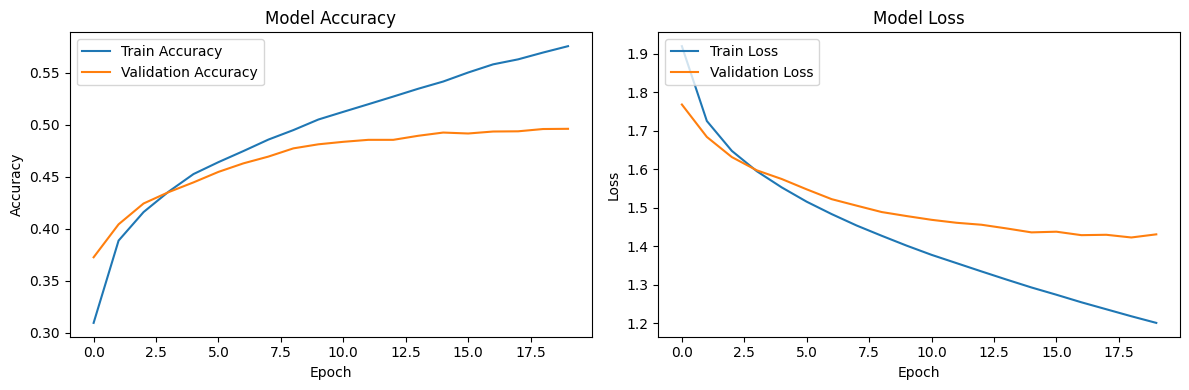

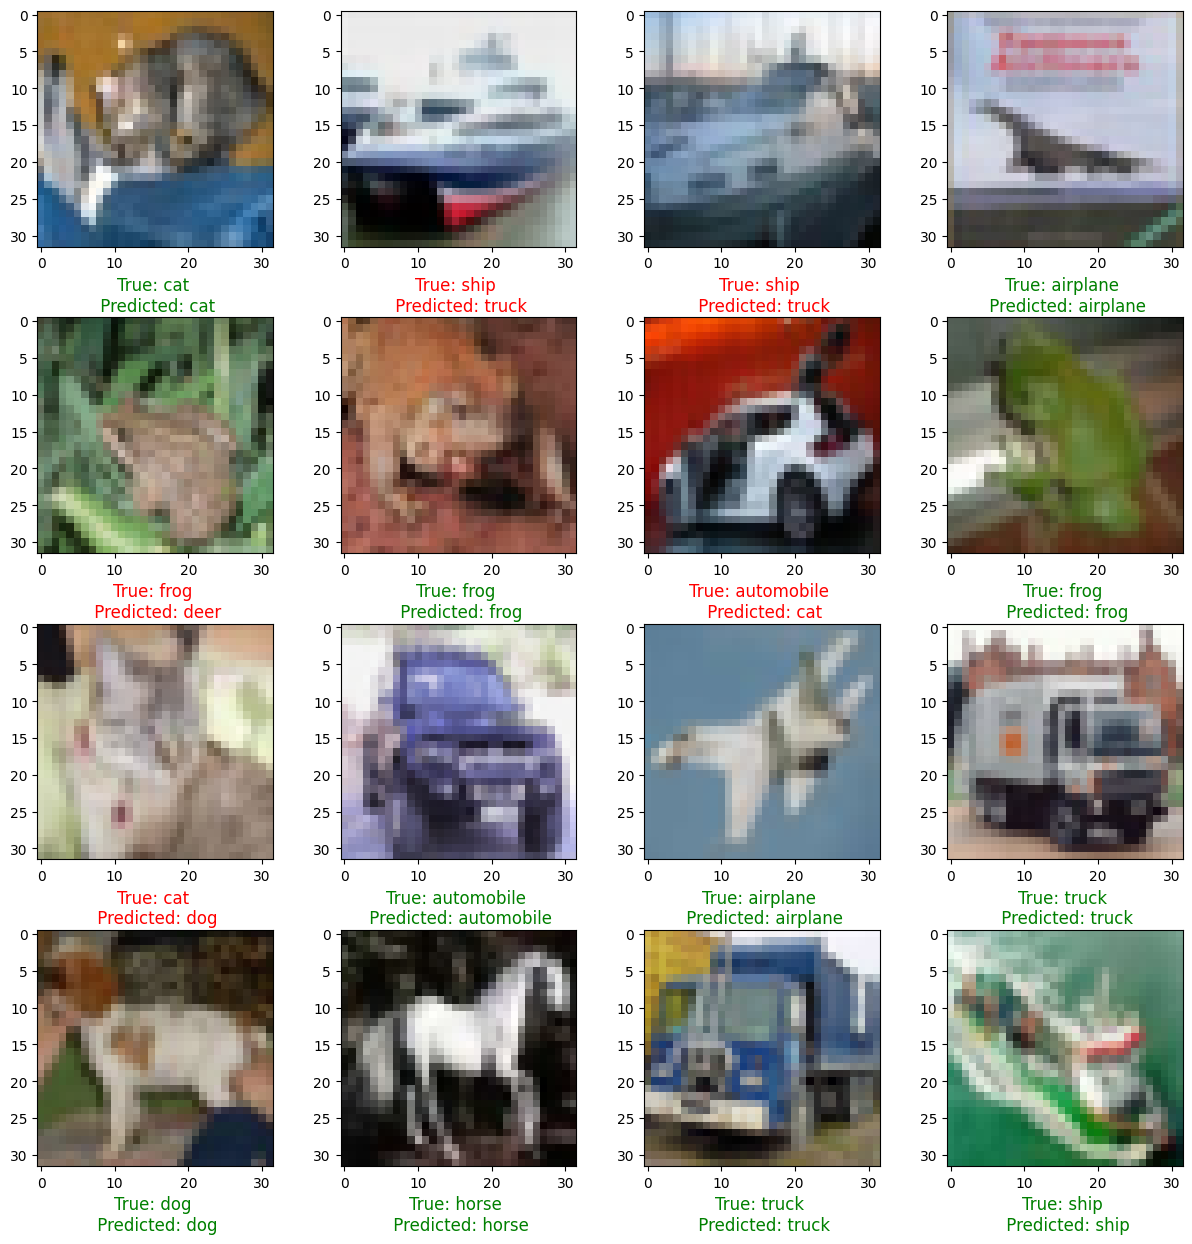

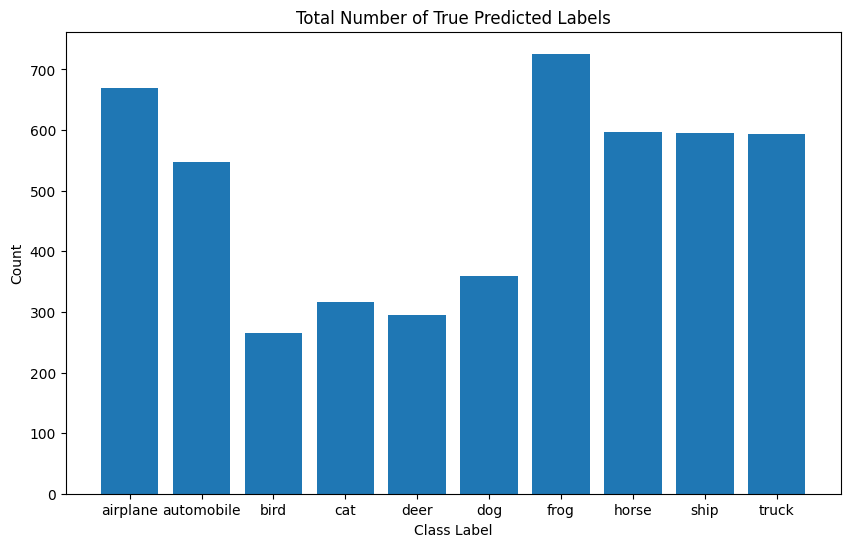

In [14]:
 # TODO

def main(epochs, val_split, batch_sz):
  """Main function to run the training pipeline.

    Args:
        epochs(int, optional): Number of epochs to train the model.
        val_split: Fraction of the training data to be used as validation data.
        batch_sz: Batch size for training.

    Returns:
        None

  """
  # (TODO)Preprocess the data
  x_train, x_test, y_train_oh, y_test_oh = data_preprocessing(X_train, X_test, y_train, y_test)

  # (TODO)Build Model
  model = build_model(input_shape=x_train.shape[1:], num_classes=10)

  # (TODO)Compile model
  compile_model(model)

  # Train model
  history = train_model(x_train, y_train_oh, model, epochs=epochs, val_split=val_split, batch_sz=batch_sz)

  test_loss, test_acc = model.evaluate(x_test, y_test_oh)
  print('Test accuracy:', test_acc)

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_true = np.argmax(y_test_oh, axis=1)

  # Plots
  plot_metrics(history)
  plot_predictions(X_test, y_true, y_pred, num_samples=16)
  plot_label_comparison(y_true, y_pred)

  test_model_accuracy(history=history)

  return history

if __name__ == "__main__":

    # (TODO) Feel free to adjust the parameters
    history = main(epochs=20, val_split=0.2, batch_sz=32)

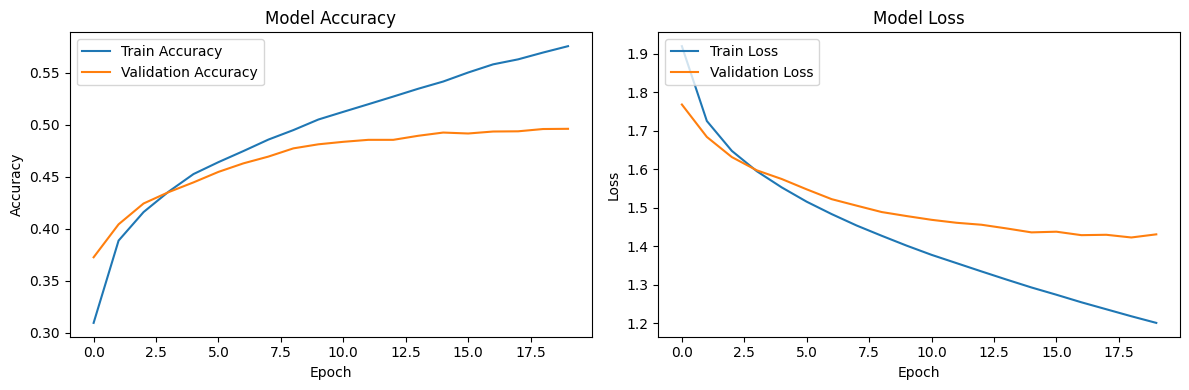

In [15]:
plot_metrics(history)

## Improvement Strategies

Consider the following strategies to help improve the accuracy of the above model.


1. **Increase the number of epochs**: The model might need more training iterations to learn the patterns in the data effectively.
2. **Add more FFN layers:** Stacking multiple FFN layers can help the model capture more complex dependencies.
3. **Adjust the learning rate:** Fine-tuning the learning rate can impact the model's convergence speed and performance.
4. **Try different Optimizers:** Explore various optimization algorithms (e.g., SGD, RMSprop).
Replace Adam in the `compile_model` function with another optimizer from `keras.optimizers`.
